##### <center>Quantium Virtual Internship</center>
### <center>Task2: Experimentation and Uplift Testing</center>
### Objective:
The main objective of this task is to evaluate the performance of the trial stores,77,86 and 88 selected by the client within a trial period of Feb 2019 to April 2019 using control stores that are operational within the given trial period.
#### Specific Objectives
- Identifying metrics that would be used for selecting control stores
- Use the selected metrics to select control stores.
- Evaluate the performance of the trial stores using control stores.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

### Loading the dataset

In [2]:
# Using Pandas to load the dataset
df = pd.read_csv('D:/sqldatasets/Foragedatasets/QVI_data.csv')

In [3]:
#Displaying the first 3 records of the dataset
df.head(3)

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget


### Control stores selection metrics
Here the control stores would be selected based on the following metrics.
- Monthly overall sales revenue.
- Monthly number of customers
- Monthly transactions per customers

### Selecting control stores
- To select a control store a metrics would be selected and  the stores filtered through out the trial period.To do so , a Year/Month column which will be used for filtering the stores' data from 02/2019 to 05/2019 would be created in the dataset. 

#### Creating the year_month column

In [4]:
df['DATE'] = pd.to_datetime(df['DATE'])
df["year_month"] = df['DATE'].dt.strftime("%Y%m").astype('int64')
df.head(3)

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,year_month
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium,201810
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream,201809
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget,201903


#### Metrics Calculations

In [5]:
group_df = df.groupby(['STORE_NBR','year_month'])
#Calculating the monthly sales revenue per store
tot_sales = group_df.TOT_SALES.sum()
#Calculating  the monthly number of customer
n_cust = group_df.LYLTY_CARD_NBR.nunique()
#Calculating the average number of monthly transactions for each store per customer
n_trxn_percust = group_df.TXN_ID.size()/n_cust
# Calculating the average monthly number of chips bought per transaction
n_chips_pertrxn = group_df.PROD_QTY.sum()/group_df.TXN_ID.size()
# Calculating the monthly average price per chip for each month
avg_price_perchip = tot_sales/group_df.PROD_QTY.sum()

# Creating a metric dataframe
data = [tot_sales,n_cust,n_trxn_percust,n_chips_pertrxn,n_chips_pertrxn,avg_price_perchip]
metric_df = pd.concat(data,axis = 1)
metric_df.columns = ['tot_sales','n_cust','n_trxn_percust','n_chips_pertrxn','n_chips_pertrxn','avg_price_perchip']
metric_df = metric_df.reset_index()

In [6]:
metric_df.head()

,STORE_NBR,year_month,tot_sales,n_cust,n_trxn_percust,n_chips_pertrxn,n_chips_pertrxn,avg_price_perchip
0,1,201807,206.9,49,1.061224,1.192308,1.192308,3.337097
1,1,201808,176.1,42,1.023810,1.255814,1.255814,3.261111
2,1,201809,278.8,59,1.050847,1.209677,1.209677,3.717333
3,1,201810,188.1,44,1.022727,1.288889,1.288889,3.243103
4,1,201811,192.6,46,1.021739,1.212766,1.212766,3.378947


Selecting stores that were operational for 12 months over the period of July 2018 to June 2019.

In [7]:
# Counting the number of unique months of operation per store
month_counts = metric_df.groupby('STORE_NBR').year_month.nunique().reset_index()
#selecting store that have been running for over 12 months from 2018/07 to 2019/06
storeID_fullobservs = month_counts[month_counts.year_month == 12].STORE_NBR
# Extracting the data for stores that have operational from 2018/07 to 2019/06
stores_fullobservs_df = metric_df[metric_df['STORE_NBR'].isin(storeID_fullobservs)]

In [8]:
stores_fullobservs_df.head()

,STORE_NBR,year_month,tot_sales,n_cust,n_trxn_percust,n_chips_pertrxn,n_chips_pertrxn,avg_price_perchip
0,1,201807,206.9,49,1.061224,1.192308,1.192308,3.337097
1,1,201808,176.1,42,1.023810,1.255814,1.255814,3.261111
2,1,201809,278.8,59,1.050847,1.209677,1.209677,3.717333
3,1,201810,188.1,44,1.022727,1.288889,1.288889,3.243103
4,1,201811,192.6,46,1.021739,1.212766,1.212766,3.378947


In [9]:
#Extracting the pre-trial data.
pre_trial_metric = stores_fullobservs_df[stores_fullobservs_df['year_month']< 201902]
pre_trial_metric.head()

,STORE_NBR,year_month,tot_sales,n_cust,n_trxn_percust,n_chips_pertrxn,n_chips_pertrxn,avg_price_perchip
0,1,201807,206.9,49,1.061224,1.192308,1.192308,3.337097
1,1,201808,176.1,42,1.023810,1.255814,1.255814,3.261111
2,1,201809,278.8,59,1.050847,1.209677,1.209677,3.717333
3,1,201810,188.1,44,1.022727,1.288889,1.288889,3.243103
4,1,201811,192.6,46,1.021739,1.212766,1.212766,3.378947


In [10]:
def corr_calcalculation(trial,metric_col,input_table = pre_trial_metric):
    #Trial storesIDs
    trial_stores = [77, 86, 88]
    # Selecting all stores IDs except the trial stores IDs
    control_storesIDs = storeID_fullobservs[~storeID_fullobservs.isin(trial_stores)]
    # Getting the metric column for each trial store
    trial_vals = input_table[input_table["STORE_NBR"] == trial][metric_col].reset_index()
    #Creating a dataframe to hold the correlation values between control and trial stores
    corr_table = pd.DataFrame(columns = ['year_month', 'trial_store', 'control_store', 'correlation']) 
    # Find the correlation for each control store 
    for controlID in control_storesIDs:
        #Getting the control metrics for each control store
        control_vals = input_table[input_table["STORE_NBR"] == controlID][metric_col].reset_index() 
        corr_row = pd.DataFrame(columns = ['year_month', 'trial_store', 'control_store', 'correlation'])
        corr_row.year_month = list(input_table.loc[input_table.STORE_NBR == controlID]['year_month'])
        corr_row.trial_store = trial
        corr_row.control_store = controlID
        #Calculating pairwise correlation between columns for two dataframes
        corr_row.correlation = control_vals.corrwith(trial_vals,axis = 1)
        corr_table = pd.concat([corr_table, corr_row]) # add each store's block to the dataframe 
    return (corr_table)
     

In [11]:
trial_stores = [77, 86, 88]
corr_table = pd.DataFrame(columns = ['year_month', 'trial_store', 'control_store', 'correlation'])
for store in trial_stores:
    corr_section = corr_calcalculation(store, ['tot_sales', 'n_cust','n_trxn_percust','n_chips_pertrxn', 'n_chips_pertrxn', 'avg_price_perchip'])
    #concatenating the dataframes horizontally for each trial store
    corr_table = pd.concat([corr_table, corr_section])
corr_table.sort_values('correlation',ascending = False)

,year_month,trial_store,control_store,correlation
0,201807,86,78,0.999996
6,201901,77,121,0.999995
5,201812,86,70,0.999994
6,201901,88,81,0.999992
0,201807,86,100,0.999988
...,...,...,...,...
6,201901,77,3,0.116061
3,201810,77,3,0.114071
6,201901,77,1,0.103636
2,201809,77,1,0.102581


Apart from correlation, we can also calculate a standardised metric based on the absolute difference between the trial store's performance and each control store's performance. Write a function to calculate the magnitude distance.

In [15]:
def dist_calculation(trial,metric_cols, input_table = pre_trial_metric):
    #Trial stores IDs
    trial_stores = [77,86,88]
    # Getting the control_stores IDs
    control_stores = storeID_fullobservs[~storeID_fullobservs.isin(trial_stores)]
    dist_table = pd.DataFrame()
    for control in control_stores:
        dist_row = abs(input_table[input_table['STORE_NBR']==trial].reset_index()[metric_cols]\
                       -input_table[input_table['STORE_NBR']== control].reset_index()[metric_cols])
        dist_row.insert(0,'year_month',list(input_table.loc[input_table.STORE_NBR == trial]['year_month']))
        dist_row.insert(1,'trial_store',trial) 
        dist_row.insert(2,'control_store',control) 
        dist_table = pd.concat([dist_table,dist_row])
    for col in metric_cols:
        maxdist =  dist_table[col].max()
        mindist = dist_table[col].min()
        dist_table[col] = 1-(dist_table[col]-mindist)/(maxdist-mindist)
        dist_table['mag_measure'] = dist_table[metric_cols].mean(axis=1)  
    return (dist_table)

In [16]:
trial_stores = [77, 86, 88]
metric_cols = ['tot_sales', 'n_cust','n_trxn_percust','n_chips_pertrxn', 'n_chips_pertrxn', 'avg_price_perchip']
dist_table = pd.DataFrame()
for trial in trial_stores:
    dist_section  = dist_calculation(trial,['tot_sales','n_cust'])
    dist_table = pd.concat([dist_table,dist_section])
dist_table

,year_month,trial_store,control_store,tot_sales,n_cust,mag_measure
0,201807,77,1,0.935431,0.980769,0.958100
1,201808,77,1,0.942972,0.951923,0.947448
2,201809,77,1,0.961503,0.836538,0.899021
3,201810,77,1,0.988221,0.932692,0.960457
4,201811,77,1,0.962149,0.951923,0.957036
...,...,...,...,...,...,...
2,201809,88,272,0.207554,0.286822,0.247188
3,201810,88,272,0.346797,0.387597,0.367197
4,201811,88,272,0.286706,0.310078,0.298392
5,201812,88,272,0.347151,0.387597,0.367374


In [17]:
trial_stores = [77, 86, 88]
dist_table = pd.DataFrame(columns = ['year_month', 'trial_store', 'control_store', 'correlation'])
for store in trial_stores:
    corr_section = corr_calcalculation(store, ['tot_sales', 'n_cust','n_trxn_percust','n_chips_pertrxn', 'n_chips_pertrxn', 'avg_price_perchip'])
    #concatenating the dataframes horizontally for each trial store
    corr_table = pd.concat([corr_table, corr_section])
corr_table.sort_values('correlation',ascending = False)

,year_month,trial_store,control_store,correlation
0,201807,86,78,0.999996
0,201807,86,78,0.999996
6,201901,77,121,0.999995
6,201901,77,121,0.999995
5,201812,86,70,0.999994
...,...,...,...,...
6,201901,77,1,0.103636
2,201809,77,1,0.102581
2,201809,77,1,0.102581
3,201810,77,1,0.082575


In [21]:
# Write a function to generate a table of averaged correlations, distance and scores over the pretrial months for each store
# Inputs:
    # trial (int) : the trial store to test 
    # metric_col (str) : the metric label to calculate the scores for 
    # input_table (df) : the data to calculate the scores with in the pre-trial period 
# Output:
    # avg_corrmag (df) : a table with the correlations, distance and scores averaged over the pretrial months for each store
def calc_corrdist_score (trial, metric_cols, input_table=pre_trial_metric):
    # Calculate the correlations and magnitudes for all months 
    corr_vals = corr_calcalculation(trial, metric_cols, input_table)
    mag_vals = dist_calculation(trial, metric_cols, input_table)
    mag_vals = mag_vals.drop(metric_cols, axis=1) # For one metric, the two columns will be duplicates so drop one 
    
    # Combine correlations and magnitudes together to one df
    combined_corr_dist = pd.merge(corr_vals, mag_vals, on=["year_month", "trial_store", "control_store"])
    
    # Average correlations and distances over the pre-trial months 
    avg_corrmag = combined_corr_dist.groupby(["trial_store", "control_store"]).mean().reset_index()
    
    # Find a combined score by taking the weighted average of the correlations and magnitudes 
    corr_weight = 0.5
    avg_corrmag['combined_score'] = corr_weight*avg_corrmag['correlation'] + (1-corr_weight)*avg_corrmag['mag_measure']
    
    return(avg_corrmag)

In [22]:
# Write a function to output the 5 stores with the highest averaged scores combining the tot_sales and n_cust metrics
# for a given trial store over the pre-trial period 
# Inputs:
    # trial (int) : the trial store to test 
# Output:
    # scores (df) : a sorted table with the 5 highest composite scores of possible control stores 
    
def find_highestscore(trial):
    # Obtain the scores for the tot_sales and n_cust metrics separately 
    scores_tot_sales = calc_corrdist_score (trial, ['tot_sales'])
    scores_n_cust = calc_corrdist_score (trial, ['n_cust'])
    # Create a data table to store the composite results in - stores are also 
    scores_control = pd.DataFrame()
    scores_control['control_store'] = scores_tot_sales.control_store
    # Calculate the composite scores 
    scores_control['correlation'] = 0.5*scores_tot_sales.correlation + 0.5*scores_n_cust.correlation
    scores_control['mag_measure'] = 0.5*scores_tot_sales.mag_measure + 0.5*scores_n_cust.mag_measure
    scores_control['scores'] = 0.5*scores_tot_sales.combined_score + 0.5*scores_n_cust.combined_score
    return(scores_control.sort_values(by = 'scores', ascending = False).reset_index(drop = True).head(5))

In [23]:
# Now find the control stores with the highest scores for each of the trial stores 
trial_stores = [77, 86, 88]
for trial in trial_stores:
    print('Trial store: ', trial)
    print(find_highestscore(trial))
    print()

Trial store:  77
   control_store  correlation  mag_measure    scores
0            233          1.0     0.989804  0.994902
1             41          1.0     0.972041  0.986020
2             46          1.0     0.969523  0.984762
3             53          1.0     0.968421  0.984211
4            111          1.0     0.967981  0.983991

Trial store:  86
   control_store  correlation  mag_measure    scores
0            155          1.0     0.976324  0.988162
1            109          1.0     0.968180  0.984090
2            225          1.0     0.965044  0.982522
3            229          1.0     0.957995  0.978997
4            101          1.0     0.945394  0.972697

Trial store:  88
   control_store  correlation  mag_measure    scores
0             40          1.0     0.941789  0.970895
1             26          1.0     0.917859  0.958929
2             72          1.0     0.908157  0.954079
3             58          1.0     0.900435  0.950217
4             81          1.0     0.887572  0.

From the above output, it could be observed that the control stores for trial stores 77,86 and 88 are 233,155 and 40 respectively. This selection is done based on the total score.
Now that we have found the control stores, we can visually check if the drivers are similar between these and the trial stores in the pre-trial period. 

In [30]:
def make_plots(storepair, metric_col):
    trial = storepair[0]
    control = storepair[1]
    trial_plot = pre_trial_metric[pre_trial_metric.STORE_NBR == trial][['year_month', 'STORE_NBR', metric_col]]
    trial_plot = trial_plot.rename(columns = {metric_col: metric_col+'_trial'})
    control_plot = pre_trial_metric[pre_trial_metric.STORE_NBR == control][['year_month', 'STORE_NBR', metric_col]]
    control_plot = control_plot.rename(columns = {metric_col: metric_col+'_control'})
    
    other_stores = pre_trial_metric.loc[(pre_trial_metric.STORE_NBR != 77)][['year_month', 'STORE_NBR', metric_col]]
    other_stores = other_stores.loc[(pre_trial_metric.STORE_NBR != 233)]
    plot_other = other_stores.groupby('year_month')[metric_col].mean()

    ax = control_plot.plot.line(x = "year_month", y = metric_col+'_control', use_index=False, label = 'Control '+metric_col)
    ax_trial = trial_plot.plot.line(x = "year_month", y = metric_col+'_trial', use_index=False, ax=ax, label = 'Trial '+metric_col)
    ax_other = plot_other.plot.line(use_index = False, ax=ax, label = 'Other '+ metric_col)
    ax.set_ylabel(metric_col)
    plt.legend(title = 'STORE_NBR', loc = "upper left",bbox_to_anchor=(1.0, 1.0))
    positions = (0,1,2,3,4,5,6)
    labels = ("201807", '201808', '201809', '201810', '201811', '201812', '201901')
    plt.xticks (positions, labels)
    titlestr = 'The Trial Store ' + str(storepair[0]) + ' and Control Store ' + str(storepair[1]) + ' in the Pre-Trial Period'
    ax.set_title(titlestr)
    

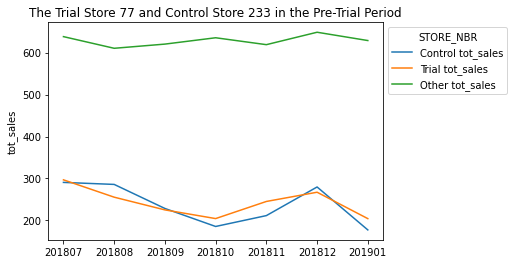

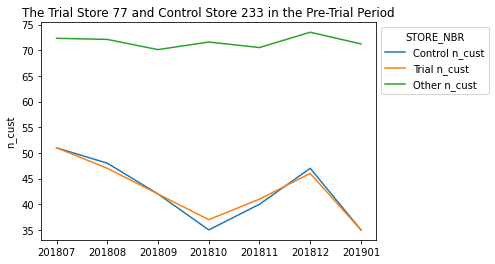

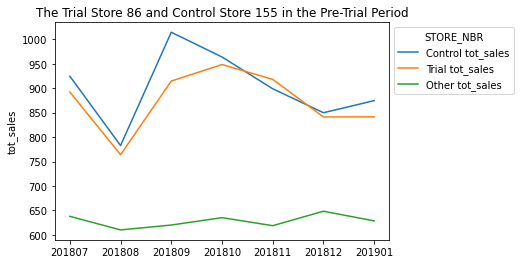

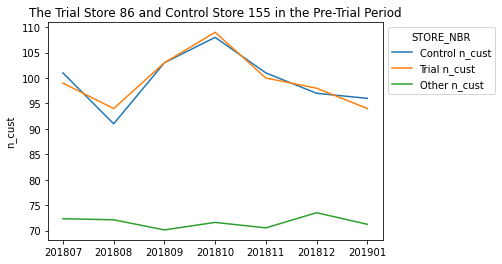

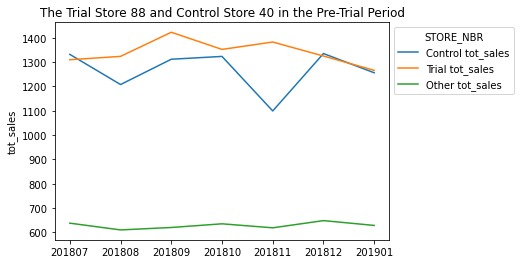

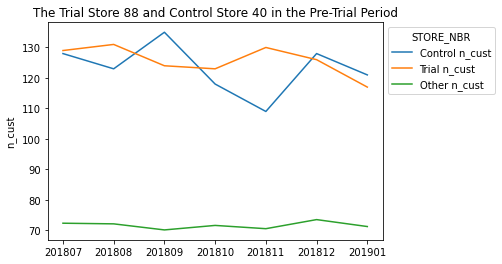

In [31]:
storepair = [[77, 233], [86, 155], [88, 40]]
metric_col = ['tot_sales', 'n_cust']
for pair in storepair:
    for metric in metric_col:
        make_plots(pair, metric)

### Evaluating the performance of trial stores using the selected control stores.
The performance of the trial stores with respect to their control stores during the trial period from Feb 2019 to Apr. 2019 could be observed using visualizations.

Now, we want to see if there has been an uplift in overall chip sales. We'll start with scaling the control store's sales to a level similar to control for any differences between the two stores outside of the trial period.

In [34]:
# Calculate the scaling factor for the store pairs
scale_store77 = pre_trial_metric[pre_trial_metric.STORE_NBR == 77]['tot_sales'].sum()/pre_trial_metric[pre_trial_metric.STORE_NBR == 233]['tot_sales'].sum()
scale_store86 = pre_trial_metric[pre_trial_metric.STORE_NBR == 86]['tot_sales'].sum()/pre_trial_metric[pre_trial_metric.STORE_NBR == 155]['tot_sales'].sum()
scale_store88 = pre_trial_metric[pre_trial_metric.STORE_NBR == 88]['tot_sales'].sum()/pre_trial_metric[pre_trial_metric.STORE_NBR == 40]['tot_sales'].sum()

In [36]:
# Extract the control store data from the df and scale according to the store 
scaled_control233 = metric_df[metric_df.STORE_NBR.isin([233])][['STORE_NBR', "year_month", 'tot_sales']]
scaled_control233.tot_sales *= scale_store77
scaled_control155 = metric_df[metric_df.STORE_NBR.isin([155])][['STORE_NBR', "year_month", 'tot_sales']]
scaled_control155.tot_sales *= scale_store86
scaled_control40 = metric_df[metric_df.STORE_NBR.isin([40])][['STORE_NBR', "year_month", 'tot_sales']]
scaled_control40.tot_sales *= scale_store88

# Combine the scaled control stores to a single df
scaledsales_control = pd.concat([scaled_control233, scaled_control155, scaled_control40]).reset_index(drop = True)
scaledsales_control = scaledsales_control.rename(columns = {'tot_sales':'scaled_tot_sales', 'STORE_NBR': 'CONTROL_NBR'}) 
# Get the trial period of scaled control stores 
scaledsales_control_trial = scaledsales_control[(scaledsales_control.year_month>=201902) & (scaledsales_control.year_month<=201904)].reset_index(drop = True)

# Get the trial period of the trial stores 
trialsales = metric_df[metric_df.STORE_NBR.isin([77,86,88])][['STORE_NBR', "year_month", 'tot_sales']].reset_index(drop = True)
trialsales = trialsales.rename(columns = {'STORE_NBR': 'TRIAL_NBR'}) 
trialsales_trial = trialsales[(trialsales.year_month >= 201902) & (trialsales.year_month <= 201904)].reset_index(drop = True)

Now that we have comparable sales figures for the control store, we can calculate the percentage difference between the scaled control sales and the trial store's sales during the trial period.

In [37]:
# Calculate the percentage difference between the control and trial store pairs for each month over the year   
percentdiff = scaledsales_control.copy()
percentdiff[['TRIAL_NBR', 'tot_sales_t']] = trialsales[['TRIAL_NBR', 'tot_sales']]
percentdiff = percentdiff.rename(columns = {'scaled_tot_sales' : 'scaled_sales_c'})
percentdiff['sales_percent_diff'] = (percentdiff.tot_sales_t-percentdiff.scaled_sales_c)\
                                    /(0.5*((percentdiff.scaled_sales_c+percentdiff.tot_sales_t)))
percentdiff.head()

,CONTROL_NBR,year_month,scaled_sales_c,TRIAL_NBR,tot_sales_t,sales_percent_diff
0,233,201807,297.565550,77,296.8,-0.002576
1,233,201808,292.652187,77,255.5,-0.135554
2,233,201809,233.998916,77,225.2,-0.038323
3,233,201810,190.085733,77,204.5,0.073060
4,233,201811,216.597421,77,245.3,0.124281


Let's see if the difference is significant using a t-test. Our null hypothesis is that the trial period is the same as the pre-trial period; we will test with a null hypothesis that there is a 0-percent difference between the trial and control stores.

In [39]:
from scipy import stats
# As our null hypothesis is that the trial period is the same as the pre-trial period,
# let's take the standard deviation based on the scaled percentage difference in the pre-trial period.
pretrial_percentdiff = percentdiff[percentdiff.year_month < 201902]
pretrial_percentdiff_std = pretrial_percentdiff.groupby(['TRIAL_NBR'])['sales_percent_diff'].agg('std').reset_index()
dof = 6 # 7 months of data - 1 

for stores in storepair: # stores numbers are stored as [trial, control] in storepair
    trialstore = stores[0]
    controlstore = stores[1]
    pretrial = percentdiff[(percentdiff.year_month < 201902) & (percentdiff.TRIAL_NBR == trialstore)]
    std = pretrial['sales_percent_diff'].agg('std')
    mean =  pretrial['sales_percent_diff'].agg('mean')
    trialperiod = percentdiff[(percentdiff.year_month >= 201902) & (percentdiff.year_month <= 201904) \
                              & (percentdiff.TRIAL_NBR == trialstore)]
    print("Trial store -", trialstore, "; control store -", controlstore)
    print("Month : t-statistic")
    for month in trialperiod.year_month.unique():
        xval = trialperiod[trialperiod.year_month == month]['sales_percent_diff'].item()
        tstat = ((xval - mean)/std)
        print(str(month), ' : ', tstat)
    print()
    
# Generate the t-statistic for the 95% percentile with 6 dof
print ('95th percentile value:', stats.t.ppf(1-0.05, 6))

Trial store - 77 ; control store - 233
Month : t-statistic
201902  :  -0.7171038288055888
201903  :  3.035317928855662
201904  :  4.708944418758203

Trial store - 86 ; control store - 155
Month : t-statistic
201902  :  1.4133618775921797
201903  :  7.123063846042149
201904  :  0.8863824572944162

Trial store - 88 ; control store - 40
Month : t-statistic
201902  :  -0.5481633746817604
201903  :  1.0089992743637755
201904  :  0.9710006270463645

95th percentile value: 1.9431802803927816


We can observe that the t-value for the trial store 77 is much larger than the 95th percentile value of the t-distribution for March and April - i.e. the increase in sales in the trial store 77 in March and April is statistically greater than in the control store. This can also be seen for March of trial store 86.

Let's create a more visual version of this by plotting the sales of the control store, the sales of the trial stores and the 95th percentile value of sales of the control store.

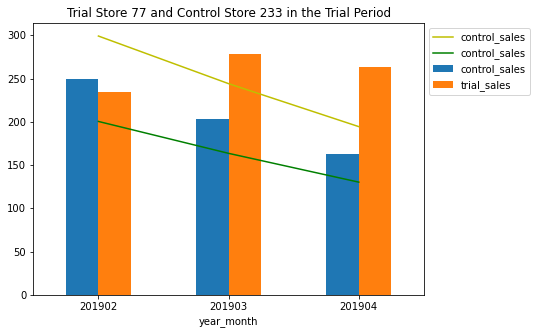

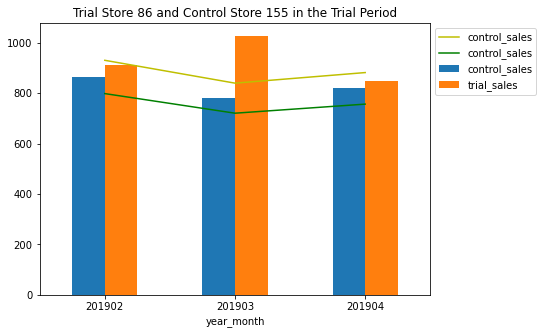

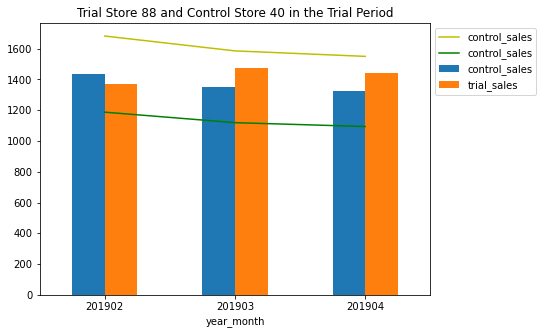

In [44]:
# First do bar graphs during the trial period
storepair = [[77, 233], [86, 155], [88, 40]]
for stores in storepair: # stores numbers are stored as [trial, control] in storepair
    trial = stores[0]
    control = stores[1]
    
    # Plot the bar chart of sales performance 
    plot_control = percentdiff[(percentdiff['CONTROL_NBR'] == control) & (percentdiff.year_month >= 201902) & (percentdiff.year_month<= 201904)]\
                    [['year_month', 'CONTROL_NBR', 'scaled_sales_c']]
    plot_control = plot_control.rename(columns = {"CONTROL_NBR" : "STORE_NBR", "scaled_sales_c": "control_sales"})
    plot_trial = percentdiff[(percentdiff['TRIAL_NBR'] == trial) & (percentdiff.year_month >= 201902) & (percentdiff.year_month<= 201904)]\
                    [['year_month', 'TRIAL_NBR', 'tot_sales_t']]
    plot_trial = plot_trial.rename(columns = {"TRIAL_NBR" : "STORE_NBR", "tot_sales_t": "trial_sales"})
    toplot = plot_control[["year_month", "control_sales"]].merge(plot_trial[["year_month", "trial_sales"]],on="year_month").set_index("year_month")
    ax = toplot.plot(kind = 'bar',  figsize=(7, 5))
    

    # plot the thresholds as lines 
    std = percentdiff[(percentdiff['CONTROL_NBR'] == control) & (percentdiff.year_month < 201902)]['sales_percent_diff'].std()
    threshold95 = plot_control.reset_index()[['year_month', 'control_sales']]
    threshold95.control_sales = threshold95.control_sales*(1+std*2)
    threshold5 = plot_control.reset_index()[['year_month', 'control_sales']]
    threshold5.control_sales = threshold5.control_sales*(1-std*2)
    ax95 = threshold95.plot.line(x = 'year_month', y = 'control_sales',color='y', figsize=(7, 5), use_index=False, ax = ax)
    ax5 = threshold5.plot.line(x = 'year_month', y = 'control_sales', color='g', figsize=(7, 5), use_index=False, ax = ax)    
    
    # Other plot features
    plt.legend(loc = "upper left",bbox_to_anchor=(1.0, 1.0))
    titlestr = 'Trial Store ' + str(trial) + ' and Control Store ' + str(control) + ' in the Trial Period'
    ax.set_title(titlestr)
    plt.show()

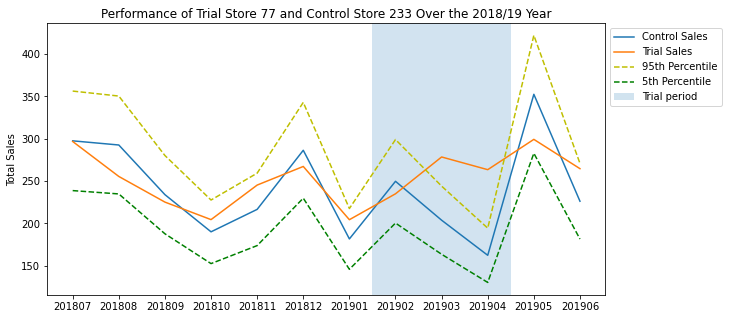

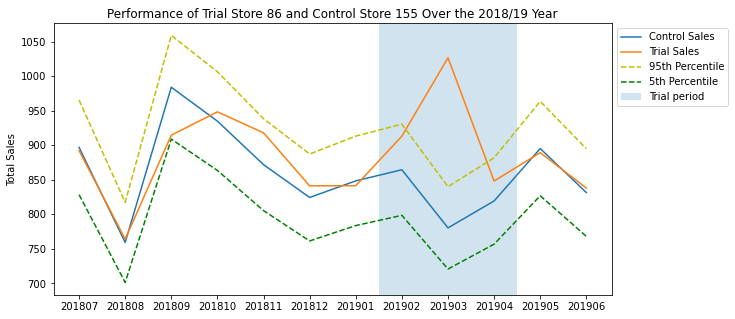

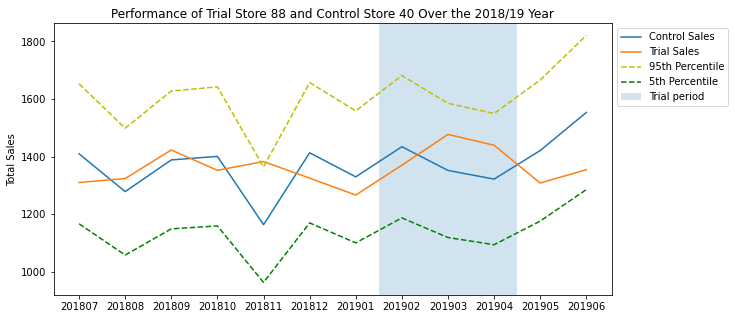

In [45]:
# Then do line graphs during the whole year - for the report 
from matplotlib.patches import Rectangle
storepair = [[77, 233], [86, 155], [88, 40]]
for stores in storepair: # stores numbers are stored as [trial, control] in storepair
    trial = stores[0]
    control = stores[1]
    
    # Plot the line graph of sales performance 
    plot_control = percentdiff[(percentdiff['CONTROL_NBR'] == control)][['year_month', 'CONTROL_NBR', 'scaled_sales_c']]
    plot_control = plot_control.rename(columns = {"CONTROL_NBR" : "STORE_NBR", "scaled_sales_c": "control_sales"})
    plot_trial = percentdiff[(percentdiff['TRIAL_NBR'] == trial)][['year_month', 'TRIAL_NBR', 'tot_sales_t']]
    plot_trial = plot_trial.rename(columns = {"TRIAL_NBR" : "STORE_NBR", "tot_sales_t": "trial_sales"})
    
    ax = plot_control.plot.line(x = "year_month", y = 'control_sales', use_index=False, label = 'Control Sales')
    ax_trial = plot_trial.plot.line(x = "year_month", y = 'trial_sales', use_index=False, ax=ax, label = 'Trial Sales')
    

    # plot the thresholds as lines 
    std = percentdiff[(percentdiff['CONTROL_NBR'] == control) & (percentdiff.year_month < 201902)]['sales_percent_diff'].std()
    threshold95 = plot_control.reset_index()[['year_month', 'control_sales']]
    threshold95.control_sales = threshold95.control_sales*(1+std*2)
    threshold5 = plot_control.reset_index()[['year_month', 'control_sales']]
    threshold5.control_sales = threshold5.control_sales*(1-std*2)
    ax95 = threshold95.plot.line(x = 'year_month', y = 'control_sales',color='y', linestyle = '--', figsize=(10, 5), use_index=False, ax = ax, label = '95th Percentile')
    ax5 = threshold5.plot.line(x = 'year_month', y = 'control_sales', color='g',  linestyle = '--', figsize=(10, 5), use_index=False, ax = ax, label = '5th Percentile')    
    ax.add_patch(Rectangle((6.5, 0), 3, 2000, alpha = 0.2, label = 'Trial period'))
    
    # Other plot features
    ax.set_ylabel('Total Sales')
    plt.legend(loc = "upper left",bbox_to_anchor=(1.0, 1.0))
    titlestr = 'Performance of Trial Store ' + str(trial) + ' and Control Store ' + str(control) + ' Over the 2018/19 Year'
    positions = (0,1,2,3,4,5,6,7,8,9, 10, 11)
    labels = ("201807", '201808', '201809', '201810', '201811', '201812', '201901', '201902', '201903', '201904', '201905', '201906')
    plt.xticks (positions, labels)
    ax.set_title(titlestr)
    plt.show()

It looks like the number of customers is significantly higher in all of the three months for store 77 and 86. This seems to suggest that the trial had a significant impact on increasing the number of customers in trial store 86 but as we saw, the statistical significance in the total sales were not as large, compared to store 77. We should check with the Category Manager if there were special deals in the trial store that were may have resulted in lower prices, impacting the results. Likewise to when considering the total sales, there appears to be no significant different in the number of customers between the control and trial stores for store 88 over the trial period.

## Conclusions
In this task, we found that the results for trial stores 77 and 86 showed a statistically significant difference in at least two stores of the three months of the trial period. However, this was not the case for store 88. We can check to see if the trial was implemented differently in store 88 but even so, we have been able to see that the trial has resulted in a significant increase in sales.

​